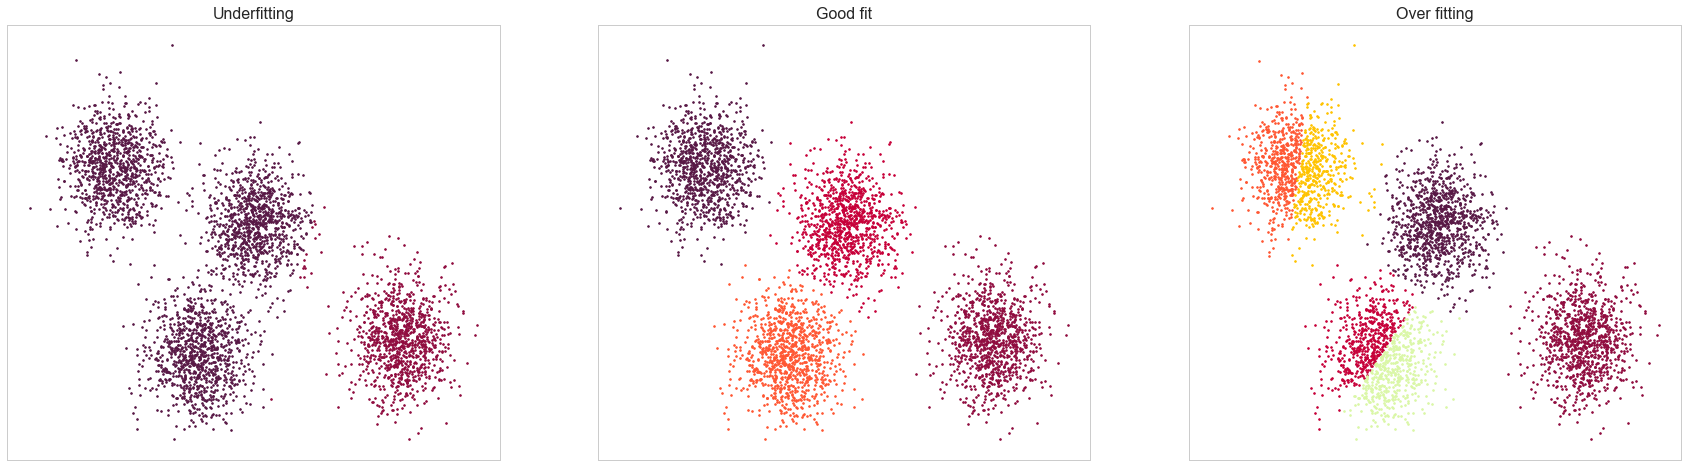

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# Calculate seeds from kmeans++
km4 = KMeans(n_clusters=4, random_state=0).fit(X)
y4 = km4.labels_.tolist()
km2 = KMeans(n_clusters=2, random_state=0).fit(X)
y2 = km2.labels_.tolist()
km6 = KMeans(n_clusters=6, random_state=0).fit(X)
y6 = km6.labels_.tolist()


# Plot init seeds along side sample data
f, axes = plt.subplots(1,3, figsize = (30,8))
colors = ['#581845', '#900C3F', "#C70039", "#FF5733", "#FFC300",  "#DAF7A6"]

for k, col in enumerate(colors[:2]):
    
    cluster_data = list(y ==k for y in y2)
    axes[0].scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

axes[0].set_title("Underfitting")
axes[0].set_xticks([])
axes[0].set_yticks([])

for k, col in enumerate(colors[:4]):
    
    cluster_data = list(y ==k for y in y4)
    axes[1].scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

axes[1].set_title("Good fit")
axes[1].set_xticks([])
axes[1].set_yticks([])

for k, col in enumerate(colors):
    
    cluster_data = list(y ==k for y in y6)
    axes[2].scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

axes[2].set_title("Over fitting")
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.savefig("blob.png")

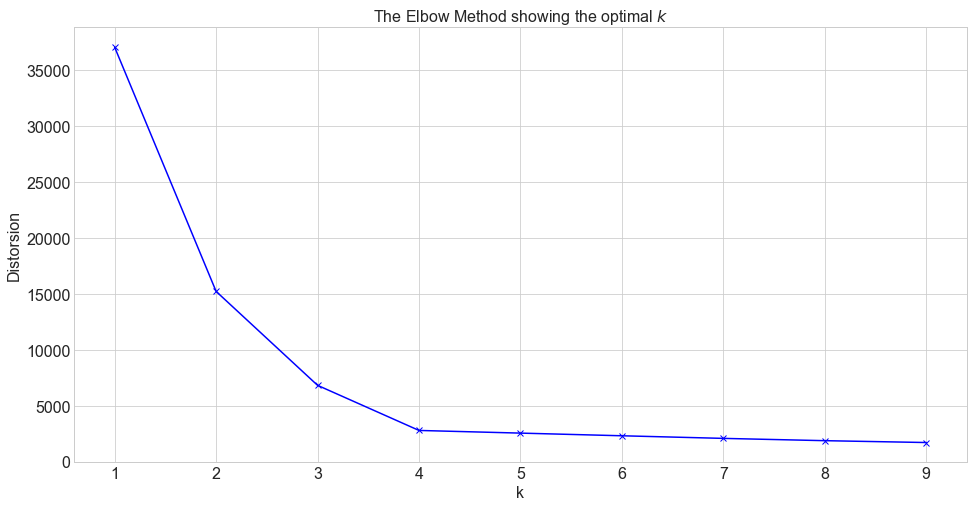

In [27]:
distorsions = list()
K = 10
for k in range(1, K):
    kmeans = KMeans(n_clusters = k, random_state = 42, algorithm = 'full').fit(X)
    distorsions.append(kmeans.inertia_)

plt.figure(figsize = (16,8))
plt.plot(range(1,K), distorsions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title(r'The Elbow Method showing the optimal $k$')
plt.savefig("elbowblob.png")